In [ ]:
# ==========================================================
# Logistics & Maintenance Dataset Analysis Project
# Author: Richard Sam
# Purpose: Perform EDA & answer research questions on logistics & vehicle maintenance data
# ==========================================================

# ------------------------------
# Cell 1 - Import libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for clarity
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)

In [44]:
# Cell 2 - Load dataset
# ------------------------------
file_path = r"C:\Users\RICHARD\Desktop\Maintenance-Datasets\logistics_dataset_with_maintenance_required.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ File loaded successfully.")
    print("Shape:", df.shape)
    display(df.head(100))
except FileNotFoundError:
    print("❌ File not found. Check the path and try again.")
except Exception as e:
    print("⚠️ Error while loading file:", e)

# ------------------------------

✅ File loaded successfully.
Shape: (92000, 27)


,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,Maintenance_Cost,Engine_Temperature,Tire_Pressure,Fuel_Consumption,Battery_Status,Vibration_Levels,Oil_Quality,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,2023-04-09,Oil Change,110.165442,120.0,20.000000,5.000000,45.000000,2.247033,80.393803,Good,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,2023-07-20,Tire Rotation,265.898087,120.0,20.000000,5.000000,45.000000,0.851417,91.302461,Fair,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,2023-03-17,Oil Change,412.483470,120.0,55.000000,13.006892,50.000000,4.984557,70.109021,Good,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,Urban,15.893347,18.825290,2024-05-01,Tire Rotation,444.110857,120.0,20.000000,5.000000,45.000000,3.000329,74.932225,Good,0,1,0.060208,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,Rural,60.668320,65.605463,2023-11-15,Tire Rotation,478.841922,120.0,55.000000,5.000000,50.000000,3.942115,86.357250,Good,1,1,0.264929,1,Rainy,Urban,300.000000,6.608704,0.395193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ford F-150,2022,Van,2614,Highway,2.525101,2.438416,2024-05-29,Tire Rotation,412.058216,120.0,55.000000,5.000000,47.409753,7.840584,80.080416,Good,0,0,0.207150,0,Clear,Urban,30.000000,0.000000,0.100000
96,97,Chevy Silverado,2021,Truck,10387,Urban,8.003551,6.409895,2023-08-02,Oil Change,452.254551,120.0,20.000000,17.005634,45.000000,0.187577,61.814503,Poor,0,1,0.161598,1,Rainy,Highway,70.348006,0.000000,0.105672
97,98,Ford F-150,2012,Truck,5743,Urban,6.580406,6.713737,2023-12-22,Tire Rotation,235.658727,120.0,49.613233,13.989725,50.000000,0.494401,77.064867,Good,0,0,0.167287,0,Clear,Urban,208.748552,0.000000,0.123317
98,99,Ford F-150,2007,Truck,1070,Urban,29.472572,30.927236,2023-01-08,Tire Rotation,296.607874,120.0,20.000000,8.587166,45.000000,15.738417,79.041856,Fair,0,0,0.143404,0,Clear,Rural,30.000000,0.000000,0.140239


In [ ]:
# Cell 3 - Basic dataset overview
# ------------------------------
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- First 5 rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
print(df.describe(include="all").transpose())

# ==========================================================


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92000 entries, 0 to 91999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vehicle_ID             92000 non-null  int64  
 1   Make_and_Model         92000 non-null  object 
 2   Year_of_Manufacture    92000 non-null  int64  
 3   Vehicle_Type           92000 non-null  object 
 4   Usage_Hours            92000 non-null  int64  
 5   Route_Info             92000 non-null  object 
 6   Load_Capacity          92000 non-null  float64
 7   Actual_Load            92000 non-null  float64
 8   Last_Maintenance_Date  92000 non-null  object 
 9   Maintenance_Type       92000 non-null  object 
 10  Maintenance_Cost       92000 non-null  float64
 11  Engine_Temperature     92000 non-null  float64
 12  Tire_Pressure          92000 non-null  float64
 13  Fuel_Consumption       92000 non-null  float64
 14  Battery_Status         92000 non


Q1: Maintenance frequency by Vehicle Type:


,avg_maintenance_cost,avg_downtime,count
Vehicle_Type,,,
Van,1046.776416,3.228996,50850
Truck,1038.344005,3.187155,41150


C:\Users\RICHARD\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


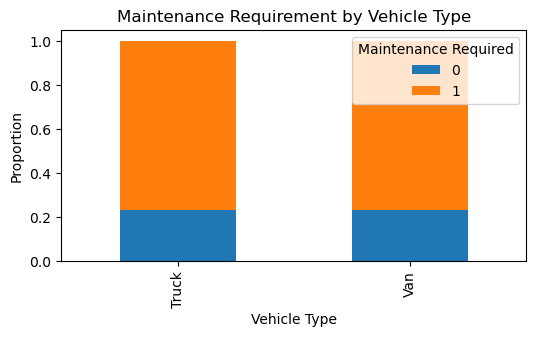

In [102]:
# RESEARCH QUESTIONS
# ==========================================================

# Q1: Which vehicle types require maintenance most frequently?
# ------------------------------------------------------------
maintenance_by_type = df.groupby("Vehicle_Type")["Maintenance_Required"].value_counts(normalize=True).unstack().fillna(0)
print("\nQ1: Maintenance frequency by Vehicle Type:")

required_cols = ['Vehicle_Type','Maintenance_Cost','Downtime_Maintenance','Vehicle_ID']
missing = [c for c in required_cols if c not in df.columns]
if missing:
    print("Cannot run Q1 — missing columns:", missing)
else:
    agg = (df.groupby('Vehicle_Type')
             .agg(
                 avg_maintenance_cost = ('Maintenance_Cost','mean'),
                 avg_downtime = ('Downtime_Maintenance','mean'),
                 count = ('Vehicle_ID','count')
             )
             .sort_values('avg_maintenance_cost', ascending=False)
    )
    display(agg.head(20))
    
# Visualization
maintenance_by_type.plot(kind="bar", stacked=True, figsize=(6,3))
plt.title("Maintenance Requirement by Vehicle Type")
plt.ylabel("Proportion")
plt.xlabel("Vehicle Type")
plt.legend(title="Maintenance Required")
plt.show()


Q2: Vehicle make with most maintenance:


,Make_and_Model,Maintenance_Count
0,Ford F-150,45917
1,Chevy Silverado,27711
2,Tesla Semi,9284
3,Volvo FH,9088


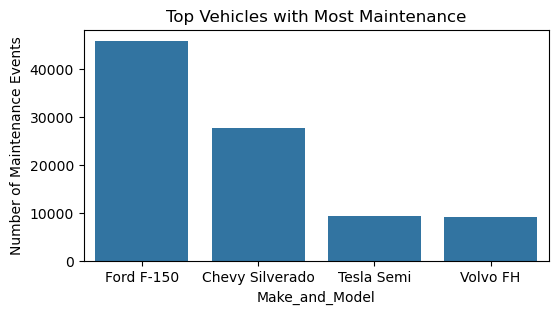

In [93]:
# Q2: - Which vehicle make required the most maintenance?
maintenance_counts = df['Make_and_Model'].value_counts().reset_index()
maintenance_counts.columns = ['Make_and_Model', 'Maintenance_Count']

print("\nQ2: Vehicle make with most maintenance:")
display(maintenance_counts.head(10))

# Plot top 10
plt.figure(figsize=(6,3))
sns.barplot(x='Make_and_Model', y='Maintenance_Count', data=maintenance_counts.head(10))
plt.title("Top Vehicles with Most Maintenance")
plt.xlabel("Make_and_Model")
plt.ylabel("Number of Maintenance Events")
plt.show()



Q3: Average Maintenance Cost by Type:
Maintenance_Type
Engine Overhaul    4005.358675
Tire Rotation       299.938745
Oil Change          299.064409
Name: Maintenance_Cost, dtype: float64


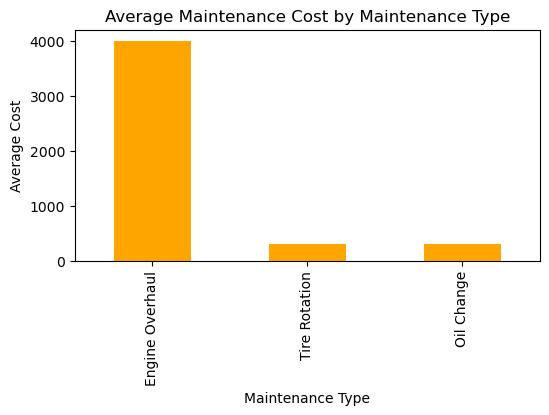

In [95]:
# Q3: What is the average maintenance cost by maintenance type?
# ------------------------------------------------------------
avg_cost = df.groupby("Maintenance_Type")["Maintenance_Cost"].mean().sort_values(ascending=False)
print("\nQ3: Average Maintenance Cost by Type:")
print(avg_cost)

# Visualization
avg_cost.plot(kind="bar", figsize=(6,3), color="orange")
plt.title("Average Maintenance Cost by Maintenance Type")
plt.ylabel("Average Cost")
plt.xlabel("Maintenance Type")
plt.show()


Q4: Most common vehicles issues:


Maintenance_Type
Oil Change         41488
Tire Rotation      32053
Engine Overhaul    18459
Name: count, dtype: int64

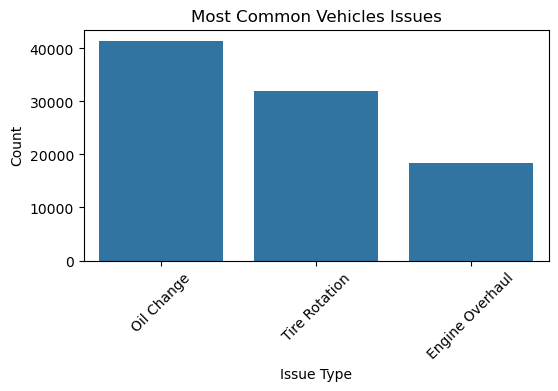

In [98]:
# Q4: What is the most common types of vehicle issues
if 'Maintenance_Type' in df.columns:
    issue_counts = df['Maintenance_Type'].value_counts()

    print("\nQ4: Most common vehicles issues:")
    display(issue_counts)

    plt.figure(figsize=(6,3))
    sns.barplot(x=issue_counts.index, y=issue_counts.values)
    plt.title("Most Common Vehicles Issues")
    plt.xlabel("Issue Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ 'Maintenance_Type' column not found in dataset.")



Q5: Average usage hours by Maintenance Requirement:
   Maintenance_Required  Usage_Hours
0                     0  2992.049098
1                     1  2988.796207


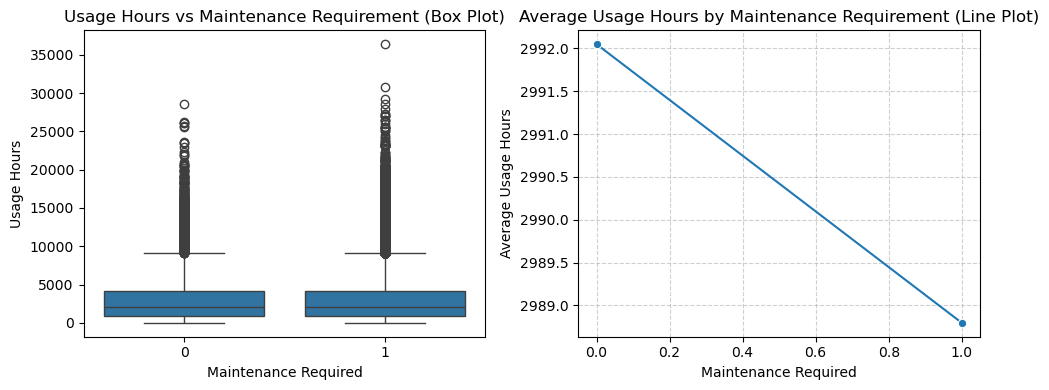

In [73]:
# Q5: Does higher usage hours increase likelihood of requiring maintenance?
# ------------------------------------------------------------
avg_usage = (
    df.groupby("Maintenance_Required")["Usage_Hours"]
    .mean()
    .reset_index()
)

print("\nQ5: Average usage hours by Maintenance Requirement:")
print(avg_usage)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Box Plot (distribution) ---
sns.boxplot(
    x="Maintenance_Required",
    y="Usage_Hours",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Usage Hours vs Maintenance Requirement (Box Plot)")
axes[0].set_xlabel("Maintenance Required")
axes[0].set_ylabel("Usage Hours")

# --- Line Plot (average trend) ---
sns.lineplot(
    x="Maintenance_Required",
    y="Usage_Hours",
    data=avg_usage,
    marker="o",
    ax=axes[1]
)
axes[1].set_title("Average Usage Hours by Maintenance Requirement (Line Plot)")
axes[1].set_xlabel("Maintenance Required")
axes[1].set_ylabel("Average Usage Hours")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()



Q6: Correlation of Features with Predictive Score:
Predictive_Score        1.000000
Fuel_Consumption        0.006130
Vibration_Levels        0.004723
Battery_Status          0.003892
Maintenance_Cost        0.003440
Usage_Hours             0.002363
Anomalies_Detected      0.002019
Tire_Pressure           0.000947
Oil_Quality             0.000363
Delivery_Times         -0.000111
Downtime_Maintenance   -0.002059
Load_Capacity          -0.002134
Vehicle_ID             -0.002205
Year_of_Manufacture    -0.002305
Actual_Load            -0.002316
Impact_on_Efficiency   -0.004088
Failure_History        -0.004711
Maintenance_Required   -0.004976
Engine_Temperature           NaN
Name: Predictive_Score, dtype: float64


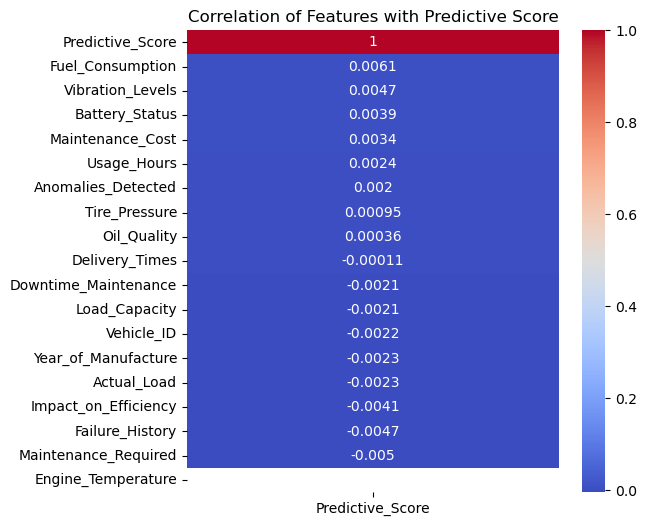

In [ ]:
# Factors correlate most with Predictive Score?
# ------------------------------------------------------------
corr = df.corr(numeric_only=True)["Predictive_Score"].sort_values(ascending=False)
print("\nQ6: Correlation of Features with Predictive Score:")
print(corr)

# Visualization
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True)[["Predictive_Score"]].sort_values(by="Predictive_Score", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Predictive Score")
plt.show()

In [74]:
# Check duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Number of duplicate rows: {duplicates}")

# ==========================================================
# END OF SCRIPT
# ==========================================================
print("\n✅ Analysis Complete.")



🔍 Number of duplicate rows: 0

✅ Analysis Complete.
